CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

1: Airplanes

2: Cars

3: Birds

4: Cats

5: Deer

6:Dogs

7:Frogs

8:Horses

9:Ships

10:Trucks

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
from keras.datasets import cifar10
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

In [78]:
X_train.shape

(50000, 32, 32, 3)

In [79]:
X_test.shape

(10000, 32, 32, 3)

In [80]:
y_train.shape

(50000, 1)

In [81]:
y_test.shape

(10000, 1)

[4]


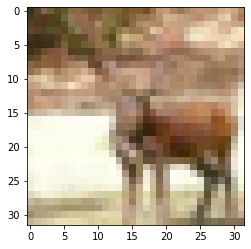

In [82]:
i = 1001
plt.imshow(X_train[i])
print(y_train[i])

[8]


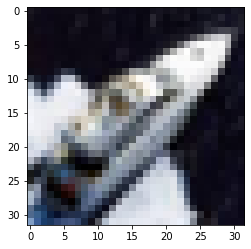

In [83]:
i = 20000
plt.imshow(X_train[i])
print(y_train[i])

/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<function matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)>

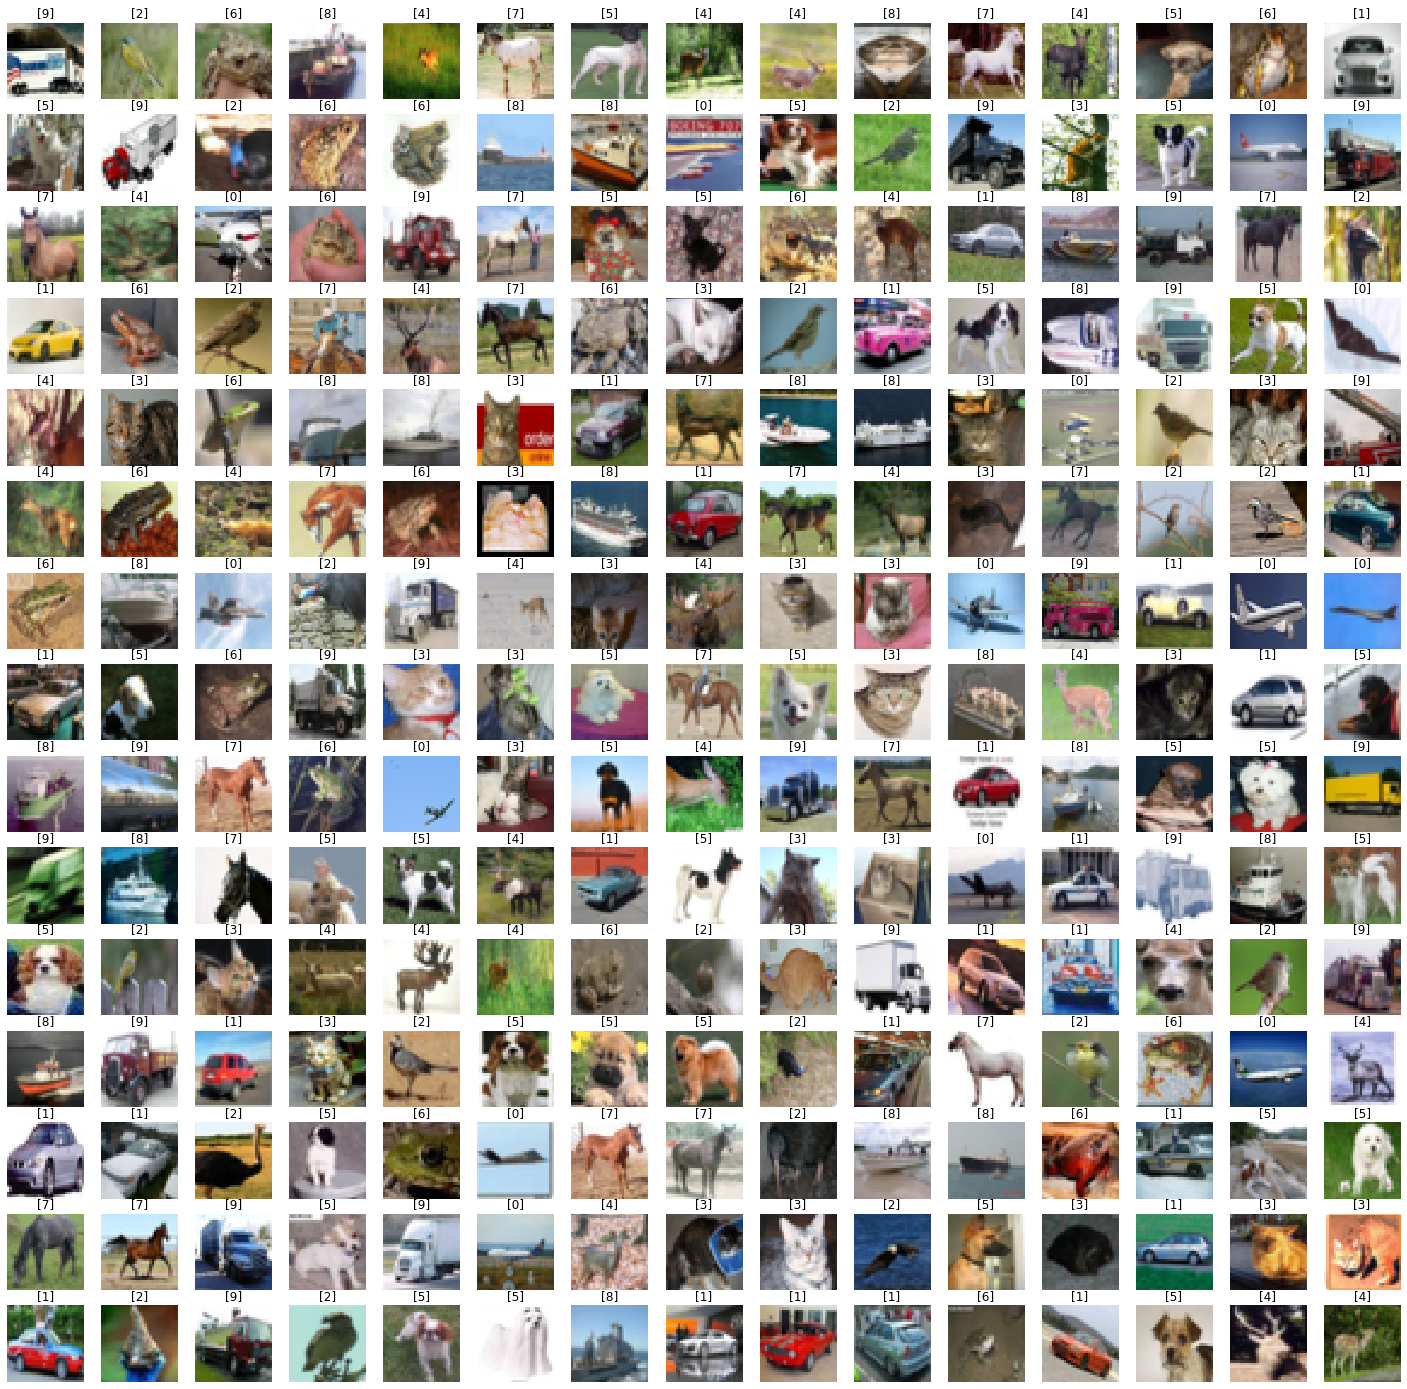

In [84]:
#Create of images
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid,figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0,n_training) #pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust

In [85]:
n_training

50000

In [86]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [87]:
number_cat = 10

In [88]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [89]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)

In [90]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [92]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [93]:
#normalize have values from 0 to 1
X_train = X_train/255
X_test = X_test/255

In [94]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [95]:
X_train.shape

(50000, 32, 32, 3)

In [96]:
Input_shape = X_train.shape[1:]

In [97]:
Input_shape

(32, 32, 3)

In [98]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [99]:
#Built convolutional neural network
#32 convolutions
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu',input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu'))
#Max Pooling
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

#Another 64 by 64
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10,activation = 'softmax'))

In [100]:
#Learning rate is how network will be trained
cnn_model.compile(loss = 'categorical_crossentropy',optimizer = keras.optimizers.rmsprop(lr = 0.001),metrics = ['accuracy'])

In [101]:
history = cnn_model.fit(X_train,y_train,batch_size = 32,epochs = 2,shuffle = 2)

Epoch 1/2
50000/50000 [==============================] - 143s 3ms/step - loss: 1.5479 - accuracy: 0.4396
Epoch 2/2
50000/50000 [==============================] - 141s 3ms/step - loss: 1.1297 - accuracy: 0.6047


In [72]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [73]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [74]:
X_train.shape

(50000, 32, 32, 3)

In [36]:
#Take sample of data which will show just 8 images
n= 15
X_train_sample = X_train[:n]

In [37]:
X_train_sample.shape

(15, 32, 32, 3)

ImageDataGenerator produces multiple variations of the image

In [43]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
#dataget_train = ImageDataGenerator(vertical_flip=True)
dataget_train = ImageDataGenerator(height_shift_range=0.5)
#dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.
Augmentations also include shifting and changing the brightness of the images.

/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


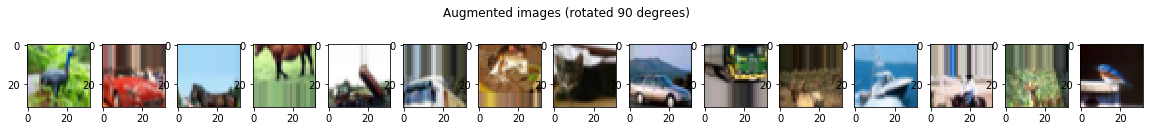

In [75]:
#plot imaages
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;



In [102]:
#Build and train model using augmented dataset
from keras.preprocessing.image import ImageDataGenerator

#New Images will have these features
datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [103]:
datagen.fit(X_train)

In [105]:
#Generating new images and fitting model with the new images
#Generate new images and train model
#Accuracy poor as only two epochs
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size = 32),epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6868 - accuracy: 0.3968
Epoch 2/2
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5804 - accuracy: 0.4387


In [108]:
score = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy', score[1])

10000/10000 [==============================] - 4s 355us/step
Test Accuracy 0.47859999537467957


In [109]:
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size = 32),epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 143s 92ms/step - loss: 1.5315 - accuracy: 0.4555
Epoch 2/50
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5021 - accuracy: 0.4670
Epoch 3/50
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4848 - accuracy: 0.4766
Epoch 4/50
1563/1563 [==============================] - 151s 96ms/step - loss: 1.4727 - accuracy: 0.4800
Epoch 5/50
1563/1563 [==============================] - 157s 100ms/step - loss: 1.4685 - accuracy: 0.4828
Epoch 6/50
1563/1563 [==============================] - 162s 104ms/step - loss: 1.4462 - accuracy: 0.4912
Epoch 7/50
1563/1563 [==============================] - 155s 99ms/step - loss: 1.4450 - accuracy: 0.4910
Epoch 8/50
1563/1563 [==============================] - 153s 98ms/step - loss: 1.4356 - accuracy: 0.4974
Epoch 9/50
1563/1563 [==============================] - 153s 98ms/step - loss: 1.4398 - accuracy: 0.4960
Epoch 10/50
1563/1563 [==============================